In [129]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

# Lecture 7 #

## Categorical Distributions - review ##

In [130]:
survey = Table().read_table('survey_fun.csv')
survey = survey.relabeled('In what year are you in your cumulative undergraduate studies?',
                         'Year in Undergrad').relabeled('In what year are you in your cumulative time at UC Berkeley?',
                            'Year at Cal').relabeled('Do you consider yourself an introvert or extrovert?',
                          'Extroversion Rating').relabeled('How many different people do you text (or any other forms of direct messaging) per day on average?',
                          'People Texted Per Day').relabeled('On average, how many hours of sleep do you get each night?',
                          'Hours of Sleep').relabeled('Are you left-handed or right-handed?', 'Handedness').relabeled('Which leg do you put in first when putting on pants?', 'Pants Leg Preference')
survey

Year in Undergrad,Year at Cal,Extroversion Rating,People Texted Per Day,Hours of Sleep,Handedness,Pants Leg Preference
Fifth or above,Third,4,2,8,Right-handed,Left leg in first
First,First,4,4,6,Right-handed,Right leg in first
Second,Second,8,8,7,Right-handed,Left leg in first
Fourth,Fourth,nan,nan,nan,nan,nan
Fourth,Fourth,5,nan,6,Right-handed,I don't know
Not an undergrad,First,8,20,6,Right-handed,Right leg in first
Third,Fourth,6,2,6,Right-handed,Right leg in first
Not an undergrad,First,6,4,8,Right-handed,Right leg in first
Second,nan,nan,nan,nan,nan,nan
Not an undergrad,First,4,1,7,Right-handed,I don't know


In [131]:
year_distribution = survey.group('Year in Undergrad')
year_distribution

Year in Undergrad,count
Fifth or above,7
First,24
Fourth,59
Not an undergrad,25
Second,83
Third,76
nan,4


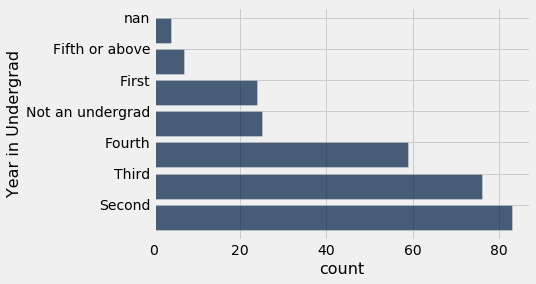

In [132]:
year_distribution.sort('count').barh('Year in Undergrad')

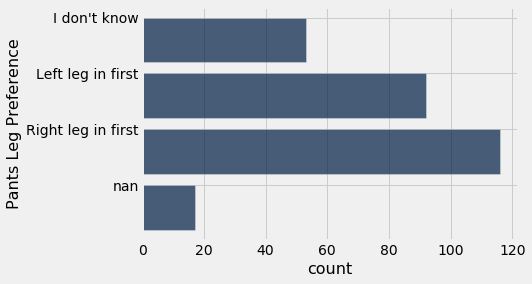

In [133]:
survey.group('Pants Leg Preference').barh('Pants Leg Preference')

## Numerical Distributions ##

In [134]:
sleep_responses = survey.select('Hours of Sleep').where('Hours of Sleep', are.above_or_equal_to(0)) 
sleep_responses

Hours of Sleep
8
6
7
6
6
6
8
7
6
7


In [135]:
sleep_bins = make_array(0,6,7.5,9,11,12)
sleep_bins

array([  0. ,   6. ,   7.5,   9. ,  11. ,  12. ])

In [148]:
#you don't need to know tbl.bin for data 8
binned_data = sleep_responses.bin('Hours of Sleep', bins = sleep_bins) 
binned_data.with_column('Percent in Each Bin',
                       binned_data.column('Hours of Sleep count')/sum(binned_data.column('Hours of Sleep count'))*100)



bin,Hours of Sleep count,Percent in Each Bin
0,19,7.36434
6,157,60.8527
7.5,72,27.907
9,8,3.10078
11,2,0.775194
12,0,0


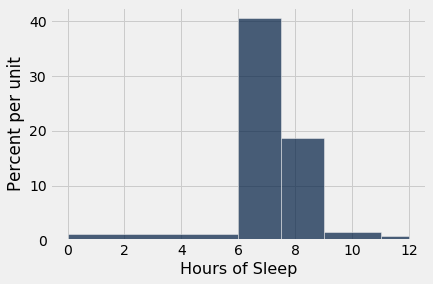

In [149]:
sleep_responses.hist('Hours of Sleep', bins = sleep_bins) #but you do need to know tbl.hist

In [154]:
percent = 60.8527   #units: %
width = 7.5 - 6 #1.5  #units: hours
height = percent/width  #units: percent per hour
height

40.568466666666666

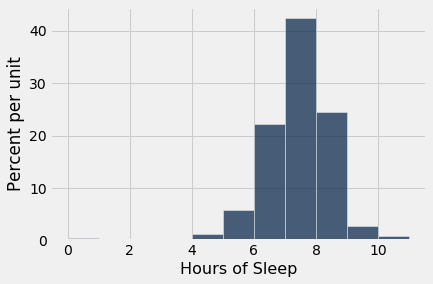

In [155]:
sleep_responses.hist('Hours of Sleep', bins = np.arange(12))

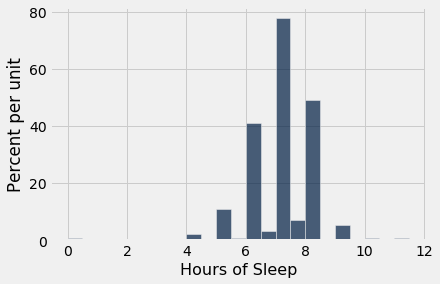

In [156]:
sleep_responses.hist('Hours of Sleep', bins = np.arange(0,12, 0.5))

In [157]:
width_of_bar = 0.5
height_of_bar = 40 #approximately
percent_in_bar = width_of_bar * height_of_bar
percent_in_bar

20.0

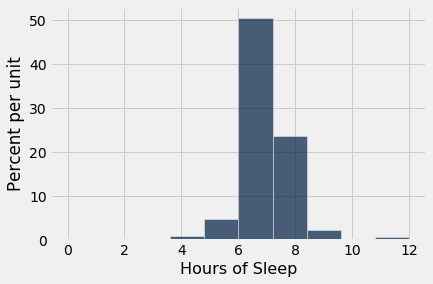

In [152]:
sleep_responses.hist('Hours of Sleep')

In [159]:
clean = survey.where('Hours of Sleep', are.above_or_equal_to(0)).where('People Texted Per Day', are.above_or_equal_to(0))
clean

Year in Undergrad,Year at Cal,Extroversion Rating,People Texted Per Day,Hours of Sleep,Handedness,Pants Leg Preference
Fifth or above,Third,4,2,8,Right-handed,Left leg in first
First,First,4,4,6,Right-handed,Right leg in first
Second,Second,8,8,7,Right-handed,Left leg in first
Not an undergrad,First,8,20,6,Right-handed,Right leg in first
Third,Fourth,6,2,6,Right-handed,Right leg in first
Not an undergrad,First,6,4,8,Right-handed,Right leg in first
Not an undergrad,First,4,1,7,Right-handed,I don't know
Third,Third,3,4,6,Right-handed,Left leg in first
Second,Second,5,4,7,Right-handed,Left leg in first
Fourth,Second,2,8,7,Right-handed,Right leg in first


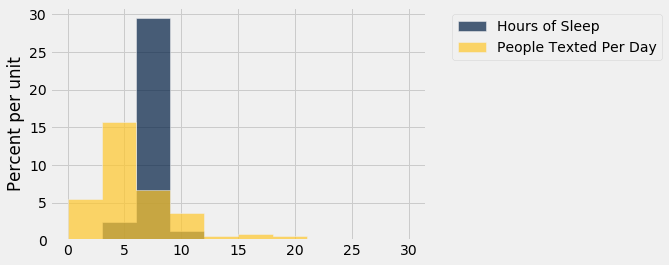

In [160]:
clean.hist('Hours of Sleep', 'People Texted Per Day')

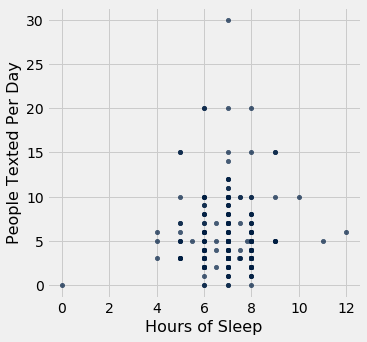

In [161]:
clean.scatter('Hours of Sleep', 'People Texted Per Day')